# 4. Handling Outliers in the Boston Housing Dataset

Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

Loading the dataset

In [2]:
boston_df = pd.read_csv('./datasets/HousingData.csv')

In [3]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


Taking care of missing values

In [5]:
boston_df.fillna(boston_df.mean(), inplace=True)

Visualize data using box plots

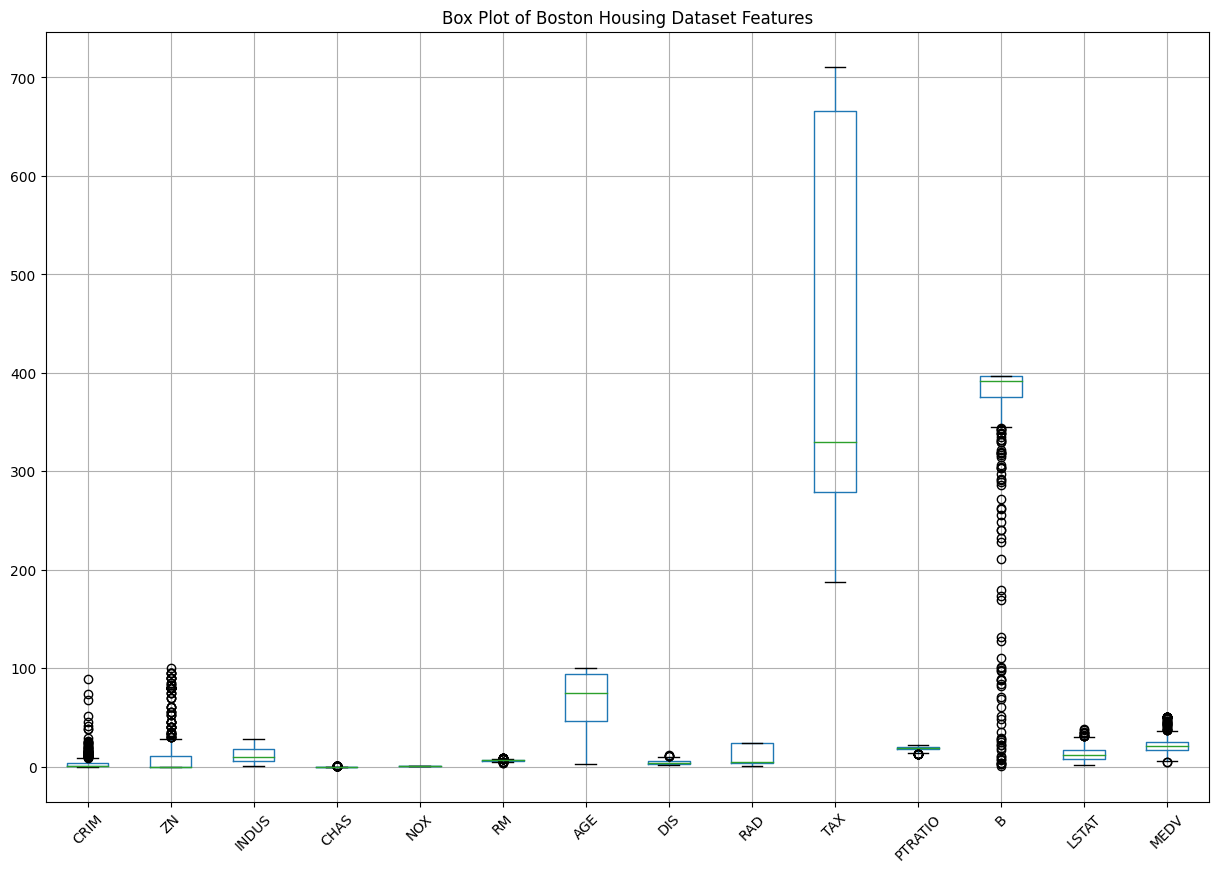

In [6]:
plt.figure(figsize=(15, 10))
boston_df.boxplot()
plt.xticks(rotation=45)
plt.title("Box Plot of Boston Housing Dataset Features")
plt.show()

Visualize data using scatter plots

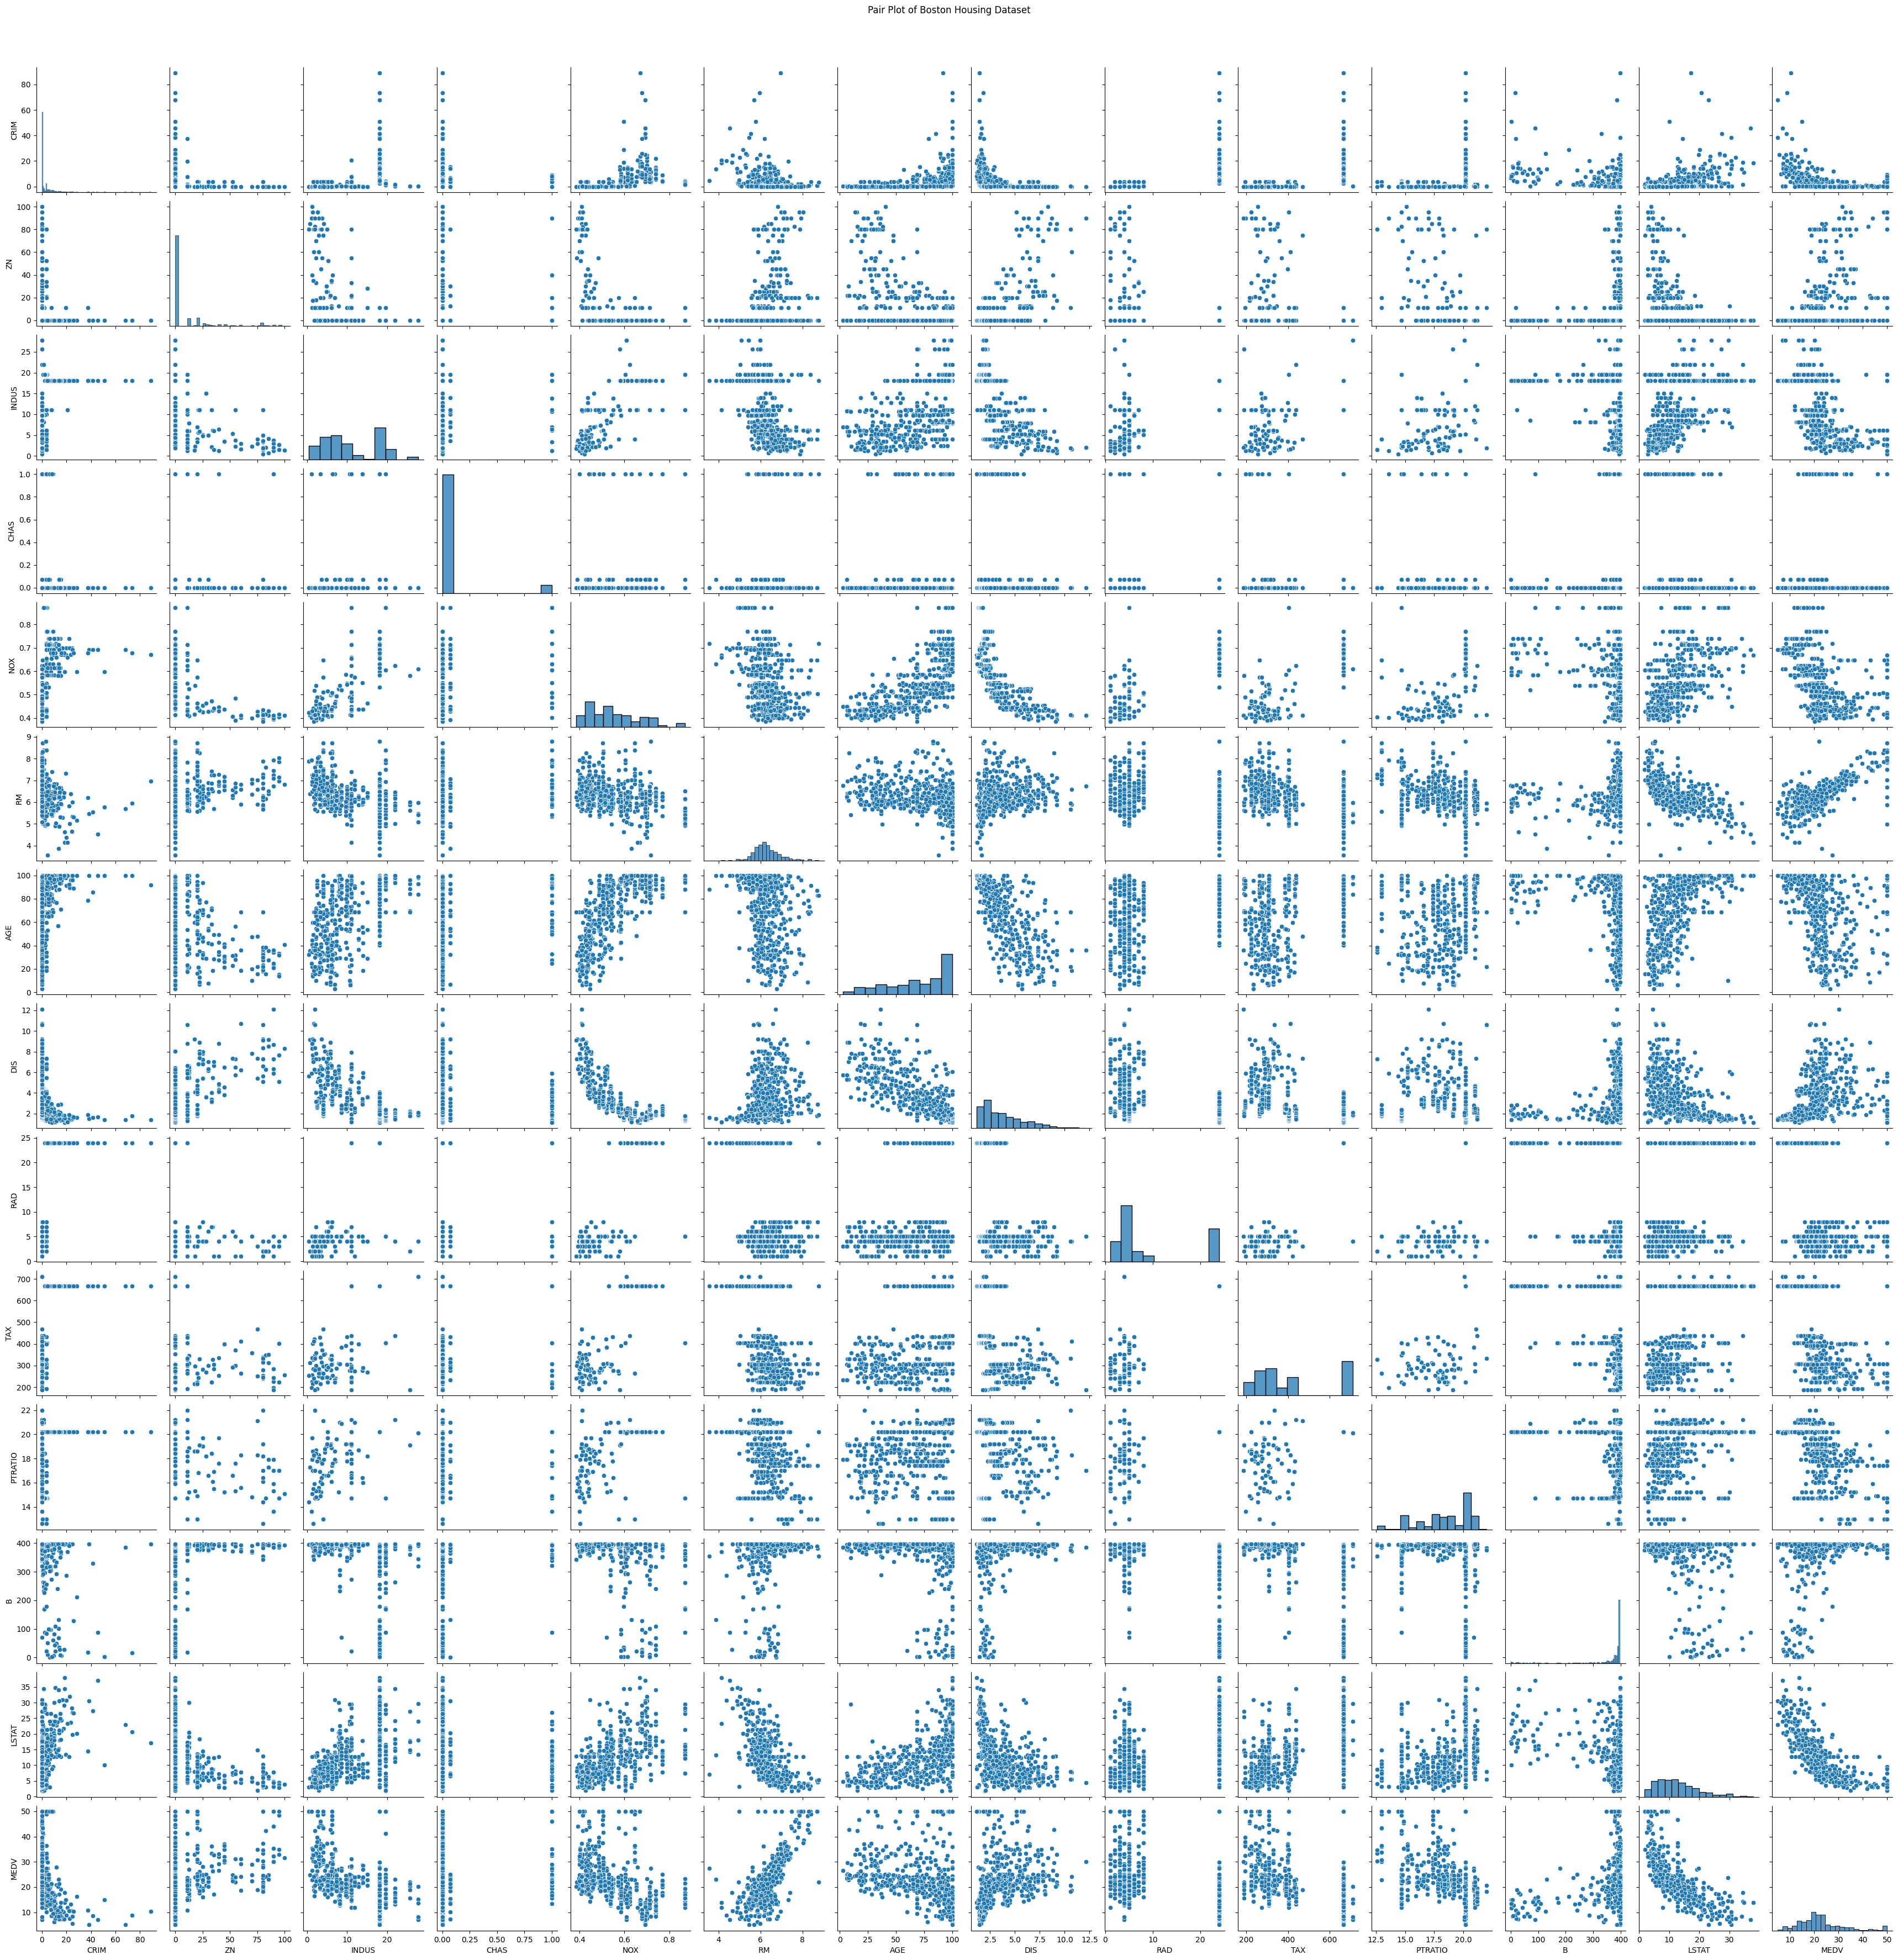

In [7]:
sns.pairplot(boston_df)
plt.suptitle("Pair Plot of Boston Housing Dataset", y=1.02)
plt.show()

# Z-score method to identify outliers

In [8]:
z_scores = np.abs(stats.zscore(boston_df))
outliers_z = (z_scores > 3).any(axis=1)
print("\nOutliers detected using Z-score method:\n", boston_df[outliers_z])


Outliers detected using Z-score method:
         CRIM     ZN      INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  \
55   0.01311   90.0   1.220000   0.0  0.403  7.249  21.9  8.6966    5  226   
56   0.02055   85.0   0.740000   0.0  0.410  6.383  35.7  9.1876    2  313   
57   0.01432  100.0   1.320000   0.0  0.411  6.816  40.5  8.3248    5  256   
65   0.03584   80.0   3.370000   0.0  0.398  6.290  17.8  6.6115    4  337   
66   0.04379   80.0   3.370000   0.0  0.398  5.787  31.1  6.6115    4  337   
..       ...    ...        ...   ...    ...    ...   ...     ...  ...  ...   
454  9.51363    0.0  18.100000   0.0  0.713  6.728  94.1  2.4961   24  666   
455  4.75237    0.0  18.100000   0.0  0.713  6.525  86.5  2.4358   24  666   
456  4.66883    0.0  18.100000   0.0  0.713  5.976  87.9  2.5806   24  666   
457  8.20058    0.0  18.100000   0.0  0.713  5.936  80.3  2.7792   24  666   
466  3.77498    0.0  11.083992   0.0  0.655  5.952  84.7  2.8715   24  666   

     PTRATIO       B 

Remove outliers using Z-score method

In [9]:
boston_df_no_outliers_z = boston_df[~outliers_z]
print("\nDataset after removing outliers using Z-score method:\n", boston_df_no_outliers_z.describe())


Dataset after removing outliers using Z-score method:
              CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  403.000000  403.000000  403.000000  403.000000  403.000000  403.000000   
mean     2.527334    7.232265   11.067578    0.002951    0.552552    6.250469   
std      4.856284   14.896270    6.574106    0.014080    0.110148    0.609160   
min      0.006320    0.000000    1.250000    0.000000    0.389000    4.368000   
25%      0.089705    0.000000    5.640000    0.000000    0.458000    5.879500   
50%      0.259150    0.000000    9.690000    0.000000    0.538000    6.182000   
75%      2.756855   11.211934   18.100000    0.000000    0.614000    6.542500   
max     28.655800   75.000000   27.740000    0.069959    0.871000    8.337000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  403.000000  403.000000  403.000000  403.000000  403.000000  403.000000   
mean    68.585259    3.743011    8.863524  397.14640

# IQR method to identify outliers

In [10]:
Q1 = boston_df.quantile(0.25)
Q3 = boston_df.quantile(0.75)
IQR = Q3 - Q1

outliers_iqr = ((boston_df < (Q1 - 1.5 * IQR)) | (boston_df > (Q3 + 1.5 * IQR))).any(axis=1)
print("\nOutliers detected using IQR method:\n", boston_df[outliers_iqr])


Outliers detected using IQR method:
          CRIM    ZN  INDUS      CHAS    NOX     RM   AGE     DIS  RAD  TAX  \
6     0.08829  12.5   7.87  0.069959  0.524  6.012  66.6  5.5605    5  311   
9     0.17004  12.5   7.87  0.069959  0.524  6.004  85.9  6.5921    5  311   
14    0.63796   0.0   8.14  0.069959  0.538  6.096  84.5  4.4619    4  307   
18    0.80271   0.0   8.14  0.000000  0.538  5.456  36.6  3.7965    4  307   
25    0.84054   0.0   8.14  0.000000  0.538  5.599  85.7  4.4546    4  307   
..        ...   ...    ...       ...    ...    ...   ...     ...  ...  ...   
478  10.23300   0.0  18.10  0.000000  0.614  6.185  96.7  2.1705   24  666   
479  14.33370   0.0  18.10  0.069959  0.614  6.229  88.0  1.9512   24  666   
482   5.73116   0.0  18.10  0.069959  0.532  7.061  77.0  3.4106   24  666   
489   0.18337   0.0  27.74  0.000000  0.609  5.414  98.3  1.7554    4  711   
490   0.20746   0.0  27.74  0.000000  0.609  5.093  98.0  1.8226    4  711   

     PTRATIO       B  LST

Remove outliers using IQR method

In [11]:
boston_df_no_outliers_iqr = boston_df[~outliers_iqr]
print("\nDataset after removing outliers using IQR method:\n", boston_df_no_outliers_iqr.describe())


Dataset after removing outliers using IQR method:
              CRIM          ZN       INDUS   CHAS         NOX          RM  \
count  257.000000  257.000000  257.000000  257.0  257.000000  257.000000   
mean     1.060545    3.511313   10.608669    0.0    0.536038    6.170206   
std      1.931899    7.730061    6.194395    0.0    0.097785    0.428246   
min      0.006320    0.000000    1.250000    0.0    0.409000    4.903000   
25%      0.082650    0.000000    5.960000    0.0    0.458000    5.889000   
50%      0.177830    0.000000    8.560000    0.0    0.520000    6.127000   
75%      0.725800    0.000000   13.920000    0.0    0.581000    6.431000   
max      8.716750   28.000000   27.740000    0.0    0.871000    7.416000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  257.000000  257.000000  257.000000  257.000000  257.000000  257.000000   
mean    65.735034    3.954142    7.003891  363.758755   18.856031  389.032879   
std     26.158666   